## About me
Hello, I'm Natalia Ziemba-Jankowska, a Machine Learning Engineer at Stepwise.
At the beginning of my journey, I contributed significantly at Linux Polska, specializing in geo-spacial (check landcover.ai), computer vision, age estimation, face recognition, image classification, and object detection.

In 2021, I took on new challenges at Samsung, where I had great opportunity to work with audio classification. The following year marked a dynamic shift to Vocaly Pro, focusing on human singing analysis. Currently, I'm on a fascinating journey with Stepwise, eagerly anticipating the exciting projects the future holds.

Beyond the algorithms and code, I have a profound love for mathematics. As an opera enthusiast, I bring a unique blend of technical acumen and a passion for the arts to the machine learning landscape.

Join me as we delve into my experiences, insights, and the harmonious intersection of machine learning and the world of singing.



In [1]:
import argparse

import librosa
import numpy as np
import matplotlib.pyplot as plt

FRAME_LENGTH = 1024
HOP_LENGTH = 512
N_MFCC = 40
N_MELS = 20

In [26]:
def extract_features(audio, sr):
    # MFCC
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=N_MFCC)

    # Mel-spectrogram
    mel = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=N_MELS)

    # Logarithm of spectrogram
    spec = librosa.stft(audio)
    log_spec = librosa.amplitude_to_db(abs(spec))

    # Extract RMS energy
    rms = librosa.feature.rms(y=audio, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)

    # Extract zero-crossing rate
    zcr = librosa.feature.zero_crossing_rate(y=audio, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)

    # Extract spectral centroid
    spec_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr, n_fft=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]

    # Extract spectral flux
    spec_flux = librosa.onset.onset_strength(y=audio, sr=sr)

    return mfcc, mel, log_spec, rms, zcr, spec_centroid, [spec_flux]

In [8]:
def plot_waveform(audio, sr):
    # Calculate time axis in seconds
    time = np.arange(0, len(audio)) / sr

    # Plot waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(audio, sr=sr)
    plt.title('Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

In [10]:
def plot_mfcc(mfcc, sr):
    plt.figure(figsize=(8, 4))
    librosa.display.specshow(mfcc, sr=sr, x_axis='time', y_axis='linear')
    plt.title('MFCC')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency')
    plt.show()

In [13]:
def plot_log_spectrogram(log_spec, sr, hop_length):
    plt.figure(figsize=(8, 4))
    librosa.display.specshow(log_spec, sr=sr, x_axis='time', y_axis='log', hop_length=hop_length)
    plt.title('Log-Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()

In [15]:
def plot_mel_spectrogram(mel_spec, sr):
    plt.figure(figsize=(8, 4))
    librosa.display.specshow(librosa.power_to_db(mel_spec, ref=np.max), sr=sr, x_axis='time', y_axis='mel')
    plt.title('Mel-Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Mel Frequency')
    plt.show()

In [18]:
def plot_spectral_centroid(centroid):
    plt.figure(figsize=(8, 4))
    plt.plot(centroid)
    plt.title('Spectral Centroid')
    plt.xlabel('Frame')
    plt.ylabel('Frequency (Hz)')
    plt.show()

In [22]:
def plot_spectral_flux(flux):
    plt.figure(figsize=(8, 4))
    plt.plot(flux)
    plt.title('Spectral Flux')
    plt.xlabel('Frame')
    plt.ylabel('Flux')
    plt.show()

In [29]:
def plot_zero_crossing_rate(zcr):
    plt.figure(figsize=(8, 4))
    plt.plot(zcr[0])
    plt.title('Zero Crossing Rate')
    plt.xlabel('Frame')
    plt.ylabel('Rate')
    plt.show()

In [31]:
def plot_rms_energy(rms):
    plt.figure(figsize=(8, 4))
    plt.plot(rms[0])
    plt.title('RMS Energy')
    plt.xlabel('Frame')
    plt.ylabel('Energy')
    plt.show()

In [3]:
audio_path = "data/adele3.wav"

In [4]:
# Load audio file
''' Parameters:
    - audio_data (np.ndarray): NumPy array containing the audio signal.
    - sr (Union[int, float]): Sampling rate of the audio signal.'''

audio, sr = librosa.load(audio_path)

In [27]:
mfcc, mel, log_spec, rms, zcr, spec_centroid, spec_flux = extract_features(audio, sr)

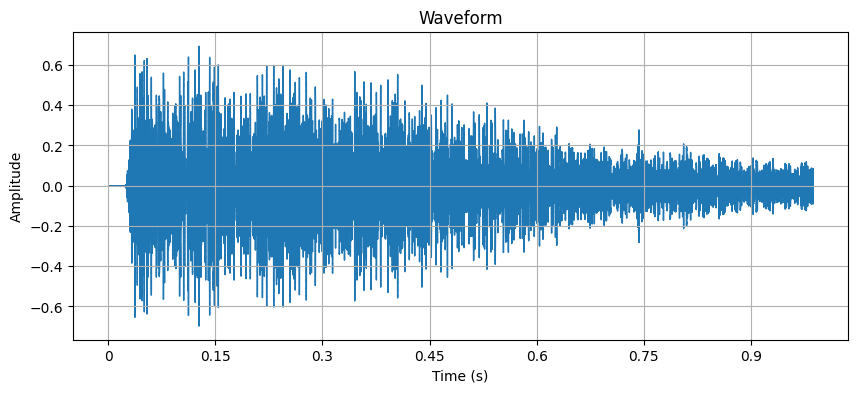

In [9]:
plot_waveform(audio, sr)

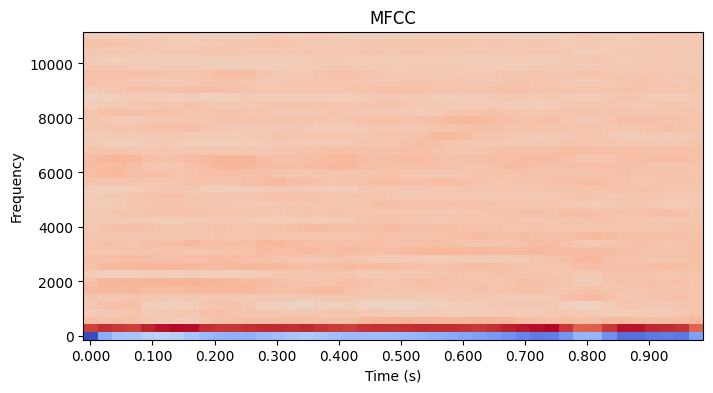

In [11]:
plot_mfcc(mfcc, sr)

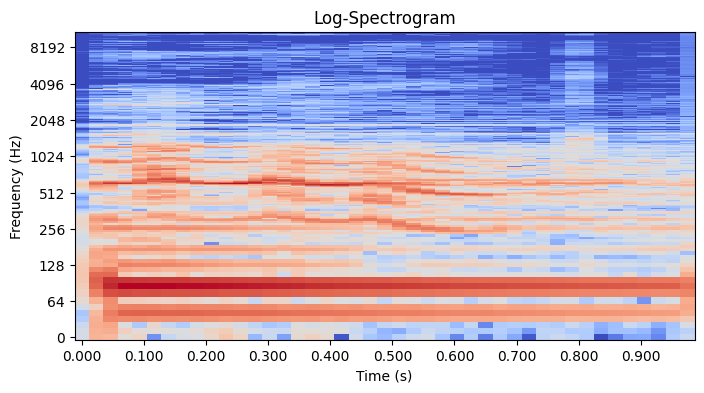

In [14]:
plot_log_spectrogram(log_spec, sr, HOP_LENGTH)

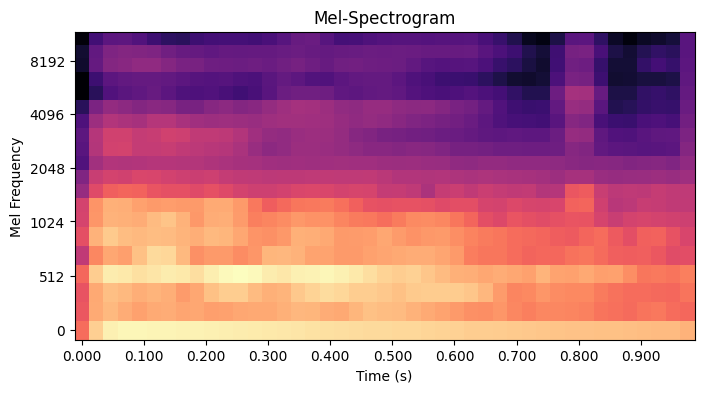

In [17]:
plot_mel_spectrogram(mel, sr)

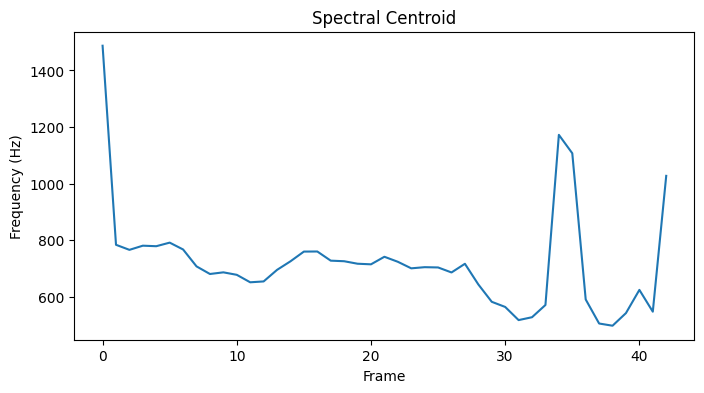

In [28]:
plot_spectral_centroid(spec_centroid)

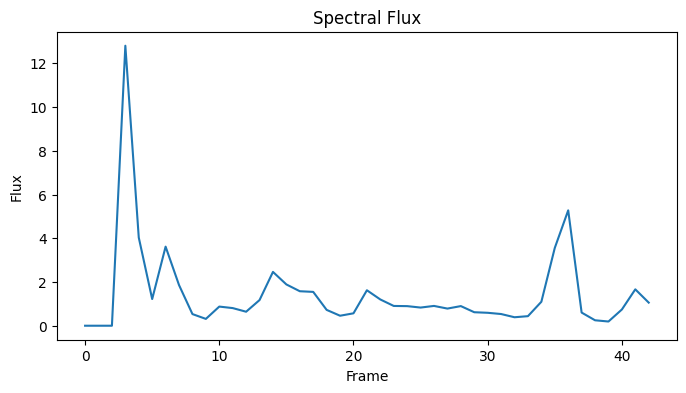

In [24]:
plot_spectral_flux(spec_flux)

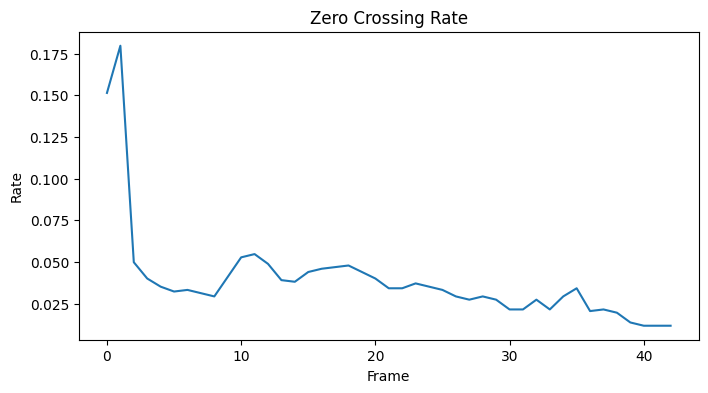

In [30]:
plot_zero_crossing_rate(zcr)

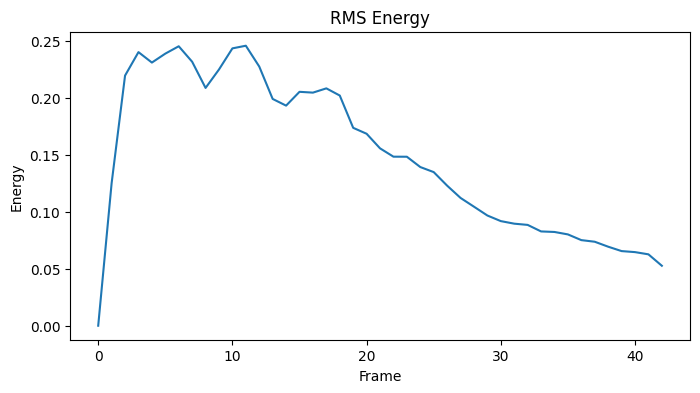

In [32]:
plot_rms_energy(rms)

In [ ]:
def add_background_noise(audio, noise, snr):
    # Load audio and noise files
    audio_data, sr = sf.read(audio)
    noise_data, _ = sf.read(noise)

    # Ensure that audio and noise are the same length
    if len(audio_data) > len(noise_data):
        noise_data = np.tile(noise_data, len(audio_data) // len(noise_data) + 1)[:len(audio_data)]

    # Compute the power of the audio signal and the noise signal
    audio_power = np.sum(audio_data ** 2)
    noise_power = np.sum(noise_data ** 2)

    # Compute the scaling factor for the noise signal based on the desired SNR
    scale_factor = np.sqrt(audio_power / (noise_power * 10 ** (snr / 10)))

    # Add the noise to the audio signal
    noisy_data = audio_data + scale_factor * noise_data

    # Normalize the noisy signal
    max_val = np.max(np.abs(noisy_data))
    if max_val > 1:
        noisy_data = noisy_data / max_val

    return noisy_data

In [ ]:
def change_pitch(audio, pitch_shift):
    # Load audio file
    audio_data, sr = librosa.load(audio)

    # Shift the pitch of the audio signal
    pitched_data = librosa.effects.pitch_shift(audio_data, sr=sr, n_steps=pitch_shift)

    return pitched_data

In [ ]:
def time_stretch(audio, stretch_factor):
    # Load audio file
    audio_data, _ = librosa.load(audio)

    # Stretch the time axis of the audio signal
    stretched_data = librosa.effects.time_stretch(audio_data, rate=stretch_factor)

    return stretched_data

In [ ]:
def apply_frequency_mask(audio, freq_mask):
    # Load audio file
    audio_data, sr = librosa.load(audio)

    # Compute the short-time Fourier transform (STFT) of the audio signal
    stft = librosa.stft(audio_data)

    # Apply the frequency mask to the magnitude spectrum of the STFT
    mag = np.abs(stft)
    freqs = np.linspace(0, sr / 2, mag.shape[0])
    mask_low = np.random.randint(0, len(freqs) - freq_mask)
    mask_high = mask_low + freq_mask
    mag[mask_low:mask_high, :] = 0

    # Reconstruct the audio signal from the modified STFT
    modified_stft = mag * np.exp(1j * np.angle(stft))
    modified_audio = librosa.istft(modified_stft)

    return modified_audio

In [ ]:
def apply_time_shift(audio, shift):
    # Load audio file
    audio_data, sr = librosa.load(audio)

    # Apply time shift
    shift_samples = int(shift * sr)
    if shift_samples > 0:
        audio_data = np.pad(audio_data[:-shift_samples], (shift_samples, 0), mode='constant')
    else:
        audio_data = np.pad(audio_data[-shift_samples:], (0, -shift_samples), mode='constant')

    return audio_data

In [ ]:
def apply_time_mask(audio, mask):
    # Load audio file
    audio_data, sr = librosa.load(audio)

    # Apply time mask
    mask_samples = int(mask * sr)
    mask_start = np.random.randint(0, len(audio_data) - mask_samples)
    mask_end = mask_start + mask_samples
    audio_data[mask_start:mask_end] = 0

    return audio_data

In [ ]:
def time_mask(audio_data, time_mask_factor):
    # Compute the time mask parameters
    t = audio_data.shape[0]
    t0 = np.random.randint(0, t - time_mask_factor)
    t1 = t0 + time_mask_factor

    # Apply time masking
    audio_data[t0:t1] = 0

    return audio_data

In [ ]:
def frequency_mask(audio_data, frequency_mask_factor):
    # Compute the frequency mask parameters
    f = np.fft.fftfreq(audio_data.shape[0], 1 / audio_data.shape[0])
    f0 = np.random.randint(0, int(frequency_mask_factor / 2))
    f1 = f0 + int(frequency_mask_factor / 2)

    # Apply frequency masking
    audio_fft = np.fft.fft(audio_data)
    audio_fft[f0:f1] = 0
    audio_fft[-f1:-f0] = 0
    audio_data = np.fft.ifft(audio_fft).real

    return audio_data